In [1]:
#Importing all the libraries 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

matplotlib.style.use('ggplot')
%matplotlib inline

In [11]:
#Loading the data
listings_og = pd.read_csv("/Users/tigranzohrabyan/Downloads/listings.csv", encoding = 'utf-8')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#Listing the original dataset
listings_og=listings_og.set_index('id')

In [13]:
#Listing the data types of the columns
listings_og.dtypes

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                      object
xl_picture_url                                  

In [14]:
listings_og

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20190307044035,2019-03-07,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
8077,https://www.airbnb.com/rooms/8077,20190307044035,2019-03-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.45
12604,https://www.airbnb.com/rooms/12604,20190307044035,2019-03-07,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
23691,https://www.airbnb.com/rooms/23691,20190307044035,2019-03-07,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,* Laundry facilities are available at the prem...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.94
26654,https://www.airbnb.com/rooms/26654,20190307044035,2019-03-07,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.36
27423,https://www.airbnb.com/rooms/27423,20190307044035,2019-03-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24
28160,https://www.airbnb.com/rooms/28160,20190307044035,2019-03-07,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,none,Simply the best and safest neighbourhood in T....,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
30931,https://www.airbnb.com/rooms/30931,20190307044035,2019-03-07,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,2,1,1,0,0.01
40456,https://www.airbnb.com/rooms/40456,20190307044035,2019-03-07,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,3,3,0,0,0.94


In [15]:
#Checking the statistics of the columns
listings_og.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
scrape_id,20036.0,2.019031e+13,2.664129e+00,2.019031e+13,2.019031e+13,2.019031e+13,2.019031e+13,2.019031e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,20036.0,7.736749e+07,7.348320e+07,1.565000e+03,1.537457e+07,4.749041e+07,1.328396e+08,2.472546e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,20032.0,5.779103e+00,1.390989e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.530000e+02
host_total_listings_count,20032.0,5.779103e+00,1.390989e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.530000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,20036.0,4.367998e+01,4.789321e-02,4.358671e+01,4.364515e+01,4.366269e+01,4.369607e+01,4.383171e+01


In [16]:
#Creating another dataframe to work on
listings=listings_og

In [17]:
#Converting price to a float
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '').astype('float64')

price                                           1.000000e+00
accommodates                                    3.387481e-01
bathrooms                                       3.230227e-01
bedrooms                                        3.082325e-01
beds                                            2.983001e-01
square_feet                                     2.171350e-01
guests_included                                 1.867106e-01
review_scores_location                          8.235573e-02
availability_30                                 6.743119e-02
calculated_host_listings_count_entire_homes     6.553013e-02
availability_60                                 5.766556e-02
availability_365                                5.506590e-02
availability_90                                 4.894757e-02
review_scores_cleanliness                       4.671307e-02
review_scores_rating                            4.589095e-02
host_total_listings_count                       2.439685e-02
host_listings_count     

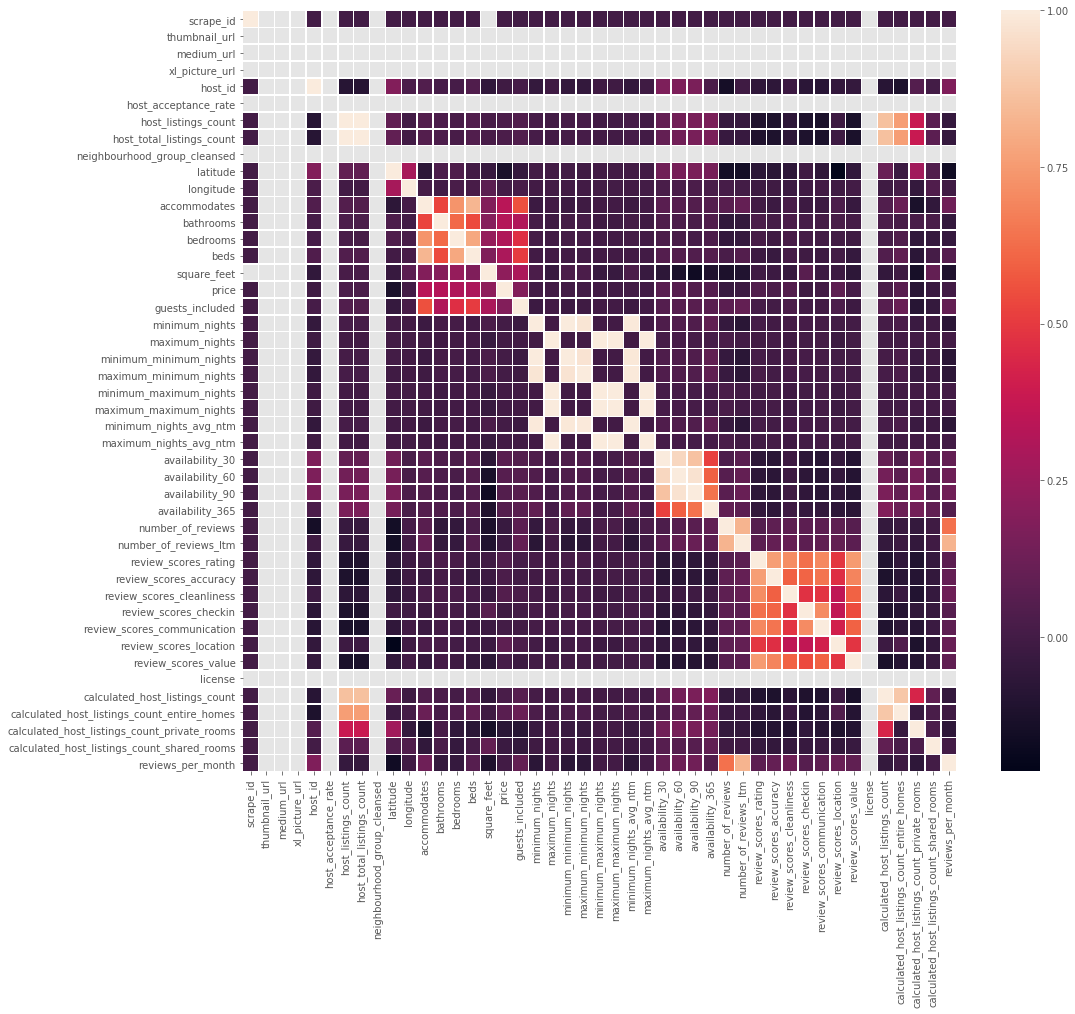

In [18]:
#Correlation Matrix to see the most correlated features with price
fig, ax = plt.subplots(figsize=(16,14))
corr = listings.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [19]:

#Based on the above correlations and a sense test, select the following features for the models
listings.head()
selected_columns = [
                'id',
                'host_response_rate',
                'host_is_superhost',
                'zipcode',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'guests_included',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value'
]

listings.drop( 
    [key for key in listings.keys() if key not in selected_columns] ,
    axis=1, 
    inplace=True)

#Since amenities is a textual feature, and we know longer the amenities means more the amenities which should be directly correlated to the price. So calculating the length of the amenities
listings.loc[:,'amenities_length'] = listings['amenities'].str.len()

#Dropping the original amenities column
listings = listings.drop(['amenities'], 1)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from ipykernel import kernelapp as app
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

reviews = pd.read_csv("/Users/tigranzohrabyan/Downloads/reviews.csv")
reviews  = reviews.dropna()
reviews.head()
reviews=reviews.set_index('listing_id')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tigranzohrabyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviews['polarity_value']="Default"
reviews['neg']=0.0
reviews['pos']=0.0
reviews['neu']=0.0
reviews['compound']=0.0
for index,row in reviews.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviews.set_value(index,'polarity_value',ss)
    reviews.set_value(index,'neg',ss['neg'])
    reviews.set_value(index,'pos',ss['pos'])
    reviews.set_value(index,'neu',ss['neu'])
    reviews.set_value(index,'compound',ss['compound'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future r

In [24]:
reviews.head()

,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
listing_id,,,,,,,,,,
1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [25]:
rscore=reviews.groupby('listing_id')['compound'].mean()

In [26]:
rscore

listing_id
1419        0.0000
8077        0.9681
23691       0.4404
26654       0.0000
27423       0.9838
28160       0.9814
30931       0.9521
40456       0.9413
41887       0.9348
43964       0.7650
44452       0.9440
44469       0.9421
45399       0.9437
45453       0.9559
45893       0.8858
50110       0.8398
51616       0.8856
63395       0.9667
64003       0.9018
64641       0.4404
65238       0.9800
69464       0.8622
71118      -0.2500
75051       0.9628
84076       0.9589
84151       0.6249
89575       0.9592
96336       0.9460
98136       0.0000
104096      0.9758
             ...  
32591314    0.6110
32599394    0.0000
32612740    0.9230
32614280    0.8766
32614514    0.4215
32616837    0.8684
32616857    0.7579
32618437    0.7088
32635446    0.8360
32643640    0.9134
32644328    0.9450
32657677    0.6249
32666904    0.8271
32668428    0.9286
32670401    0.9828
32671470    0.4215
32688383    0.0000
32691003    0.9667
32692976    0.0000
32708336    0.9377
32718834    0.1779
3

In [27]:
#Joining the two dataframes by ID 
listings_final = pd.concat([listings, rscore], axis=1, join='inner')

In [28]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
1419,NaN,f,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179,0.0000
8077,NaN,f,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161,0.9681
23691,100%,t,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,...,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618,0.4404
26654,81%,f,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,...,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645,0.0000
27423,100%,f,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279,0.9838
28160,100%,f,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539,0.9814
30931,NaN,f,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,...,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134,0.9521
40456,100%,f,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,...,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358,0.9413
41887,100%,f,M1L 2V5,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,...,2,94.0,10.0,10.0,10.0,10.0,9.0,10.0,203,0.9348
43964,100%,t,M1R 4A4,Bungalow,Entire home/apt,4,1.0,2.0,2.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,607,0.7650


In [29]:
#Converting the true/false values to binary 0/1
listings_final['host_is_superhost'].replace('t',1, inplace=True)
listings_final['host_is_superhost'].replace('f',0, inplace=True)

#Converting acceptance/response percentages to numbers
listings_final['host_response_rate'] = listings_final['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00

In [30]:
#Recoding property_type values 
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

listings_final['property_type'] = listings_final['property_type'].apply(recode)

In [31]:
#Recoding bed_type values
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

listings_final['bed_type'] = listings_final['bed_type'].apply(recode)

In [32]:
#Filling the empty values in the columns
listings_final['bathrooms'].fillna(method='ffill', inplace=True)
listings_final['bedrooms'].fillna(method='ffill', inplace=True)
listings_final['beds'].fillna(method='ffill', inplace=True)
listings_final['host_is_superhost'].fillna(value=0,inplace=True)
listings_final['host_response_rate'].fillna(value=0,inplace=True)

In [33]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
1419,0.00,0.0,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179,0.0000
8077,0.00,0.0,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161,0.9681
23691,1.00,1.0,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,...,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618,0.4404
26654,0.81,0.0,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,...,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645,0.0000
27423,1.00,0.0,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279,0.9838
28160,1.00,0.0,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539,0.9814
30931,0.00,0.0,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,...,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134,0.9521
40456,1.00,0.0,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,...,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358,0.9413
41887,1.00,0.0,M1L 2V5,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,...,2,94.0,10.0,10.0,10.0,10.0,9.0,10.0,203,0.9348
43964,1.00,1.0,M1R 4A4,Other,Entire home/apt,4,1.0,2.0,2.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,607,0.7650


In [34]:
listings_final.isna().sum()

host_response_rate               0
host_is_superhost                0
zipcode                        293
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
price                            0
guests_included                  0
review_scores_rating           271
review_scores_accuracy         281
review_scores_cleanliness      280
review_scores_checkin          285
review_scores_communication    279
review_scores_location         288
review_scores_value            286
amenities_length                 0
compound                         0
dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

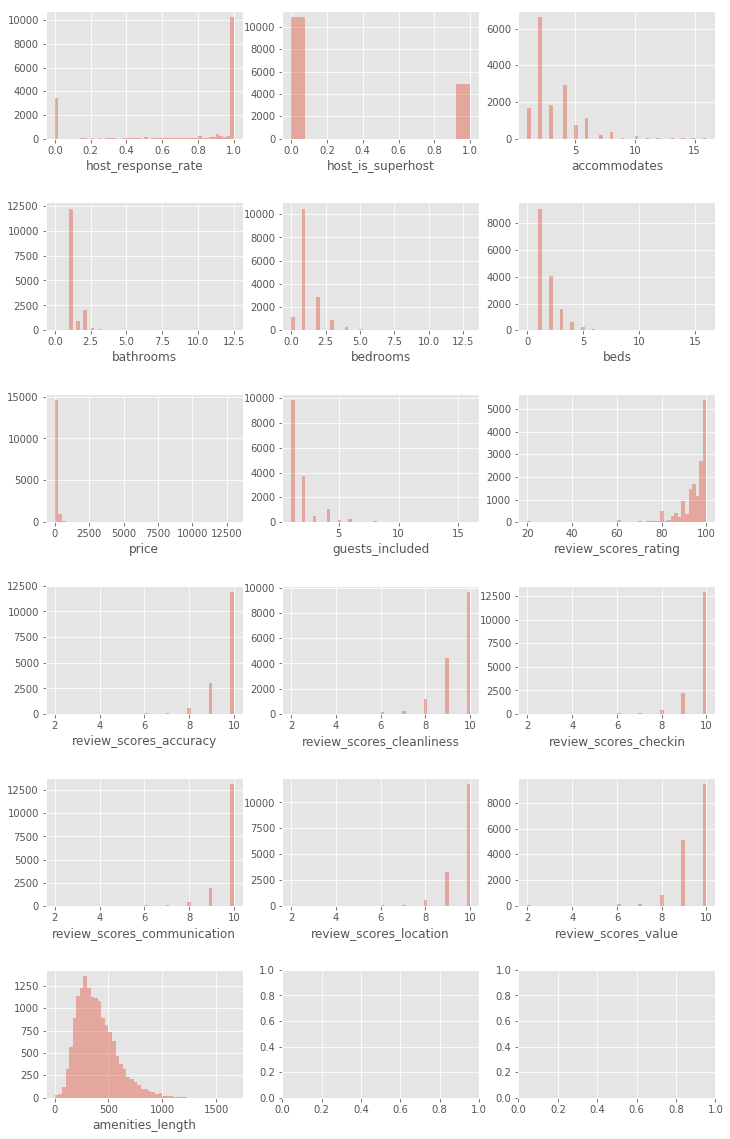

In [35]:
#Creating distribution charts for all the numbered features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = listings_final.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

graphs = len(numdf_variables)-1

position = []
for i in range(6):
    for j in range(3):
        b = i,j
        position.append(b)
        
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

price                          1.000000
accommodates                   0.389738
bedrooms                       0.350617
beds                           0.342560
bathrooms                      0.332335
guests_included                0.263015
amenities_length               0.114041
review_scores_location         0.082332
review_scores_cleanliness      0.046745
review_scores_rating           0.045844
compound                       0.027587
review_scores_accuracy         0.024156
host_is_superhost              0.023778
review_scores_value            0.009496
review_scores_communication    0.001726
host_response_rate            -0.001234
review_scores_checkin         -0.010632
Name: price, dtype: float64

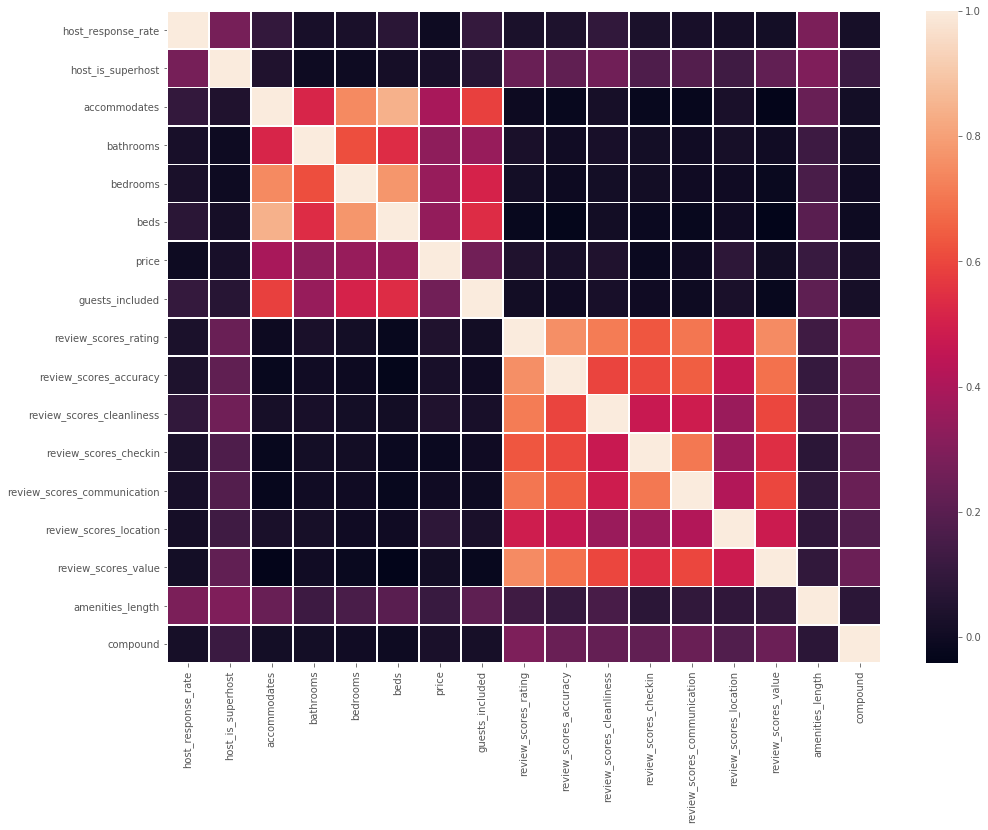

In [36]:
#Correlation Matrix with the remaining features
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [37]:
#Creating columns for the categorical fields
listings_final = pd.get_dummies(listings_final, columns=['zipcode','property_type', 'room_type', 'bed_type'])

In [40]:
listings_final.dtypes

host_response_rate             float64
host_is_superhost              float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
guests_included                  int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
amenities_length                 int64
compound                       float64
zipcode_2v5                      uint8
zipcode_L0J                      uint8
zipcode_L0K 1B0                  uint8
zipcode_L3R 3G4                  uint8
zipcode_L3T                      uint8
zipcode_L3T 1A4                  uint8
zipcode_L3T 1J3                  uint8
zipcode_L4J 1A2                  uint8
zipcode_L4J 2W5          

price                        1.000000
accommodates                 0.389738
bedrooms                     0.350617
beds                         0.342560
bathrooms                    0.332335
room_type_Entire home/apt    0.282505
guests_included              0.263015
zipcode_M5R 1P7              0.182749
zipcode_M6P 3W6              0.154399
zipcode_M5V 1P6              0.137017
zipcode_M6P 1S1              0.131156
property_type_Condominium    0.124344
amenities_length             0.114041
zipcode_M8V 4B4              0.102442
review_scores_location       0.082332
zipcode_M3B 3L3              0.056053
zipcode_M5R 2A2              0.052165
zipcode_M4E 3M2              0.050479
zipcode_M4R 1B4              0.050479
zipcode_M3C 1M8              0.050479
review_scores_cleanliness    0.046745
zipcode_M5V 0E9              0.046360
zipcode_M5J 2Z2              0.045871
review_scores_rating         0.045844
zipcode_M5P 2H5              0.045755
zipcode_M2P 1W5              0.044810
zipcode_M2L 

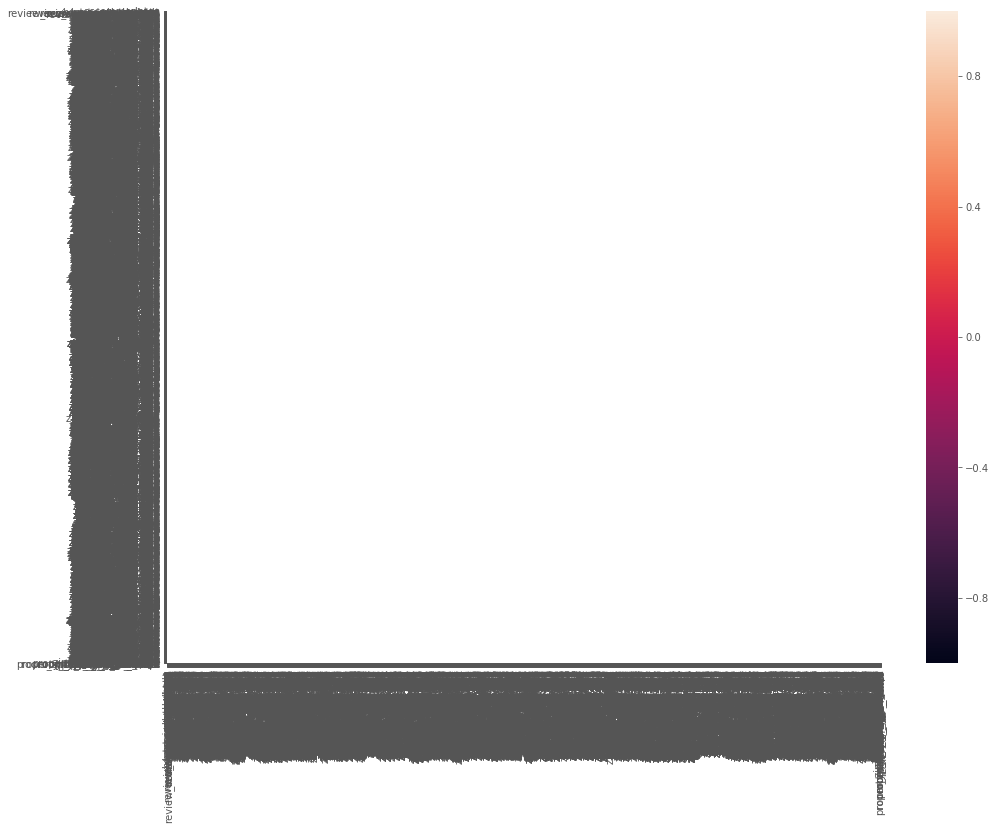

In [41]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [42]:
#Dropping rows with NAs
listings1=listings_final.dropna(subset = ['host_response_rate','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
listings1.isna().sum()

host_response_rate             0
host_is_superhost              0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
guests_included                0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
amenities_length               0
compound                       0
zipcode_2v5                    0
zipcode_L0J                    0
zipcode_L0K 1B0                0
zipcode_L3R 3G4                0
zipcode_L3T                    0
zipcode_L3T 1A4                0
zipcode_L3T 1J3                0
zipcode_L4J 1A2                0
zipcode_L4J 2W5                0
zipcode_L4J 8P7                0
zipcode_L4j0k1                 0
zipcode_M                      0
zipcode_M1B                    0
          

In [43]:
#Creating Training / Test splits

target_name = 'price'
X = listings1.drop('price', axis=1)
y=listings1[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [44]:
#OLS Regression
Xp = X_train #Dependent variable
yp = y_train #Target outcome is price
Xp = sm.add_constant(Xp) 
ols_model = sm.OLS(yp, Xp.astype(float)).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9921
Date:                Thu, 11 Apr 2019   Prob (F-statistic):              0.624
Time:                        21:54:22   Log-Likelihood:                -84819.
No. Observations:               13400   AIC:                         1.800e+05
Df Residuals:                    8217   BIC:                         2.189e+05
Df Model:                        5182                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.7329     19.262     -0.194      0.846     -41.491      34.025
host_response_rate             -3.7409      5.863     -0.638      0.523     -15.233       7.752
host_is_superhost               0.4082      5.204      0.078      0.937      -9.792      10.609
accommodates                   15.0683      2.150      7.009      0.000      10.854      19.283
bathrooms                      57.0234      5.469     10.427      0.000      46.303      67.744
bedrooms                       16.0202      4.508      3.554      0.000       7.184      24.856
beds                           -4.3710      3.849     -1.136      0.256     -11.917       3.175
guests_included                 2.3482      1.930      1.217      0.224      -1.435       6.132
review_scores_rating            0.7006      0.497      1.410      0.159      -0.274       1.675
review_scores_accuracy         -1.5202      3.943     -0.386      0.700      -9.250       6.209
review_scores_cleanliness       3.3953      2.934      1.157      0.247      -2.356       9.147
review_scores_checkin          -1.6137      3.768     -0.428      0.668      -8.999       5.772
review_scores_communication    -0.7412      4.148     -0.179      0.858      -8.872       7.390
review_scores_location         -2.8323      4.033     -0.702      0.483     -10.739       5.074
review_scores_value            -4.0732      3.611     -1.128      0.259     -11.152       3.006
amenities_length                0.0027      0.012      0.221      0.825      -0.022       0.027
compound                        2.8559      5.876      0.486      0.627      -8.663      14.375
zipcode_2v5                  3.163e-11   2.08e-11      1.519      0.129   -9.18e-12    7.24e-11
zipcode_L0J                  -342.4148    174.754     -1.959      0.050    -684.976       0.146
zipcode_L0K 1B0                 7.6254    174.073      0.044      0.965    -333.602     348.853
zipcode_L3R 3G4               -33.5062    173.957     -0.193      0.847    -374.506     307.494
zipcode_L3T                  -182.0991    174.171     -1.046      0.296    -523.517     159.319
zipcode_L3T 1A4                19.9844    173.944      0.115      0.909    -320.990     360.959
zipcode_L3T 1J3                -2.9377    174.009     -0.017      0.987    -344.039     338.164
zipcode_L4J 1A2              7.783e-12   1.83e-11      0.426      0.670    -2.8e-11    4.36e-11
zipcode_L4J 2W5               -19.9934    123.386     -0.162      0.871    -261.862     221.875
zipcode_L4J 8P7               -45.3428    173.852     -0.261      0.794    -386.136     295.451
zipcode_L4j0k1                 64.8419    173.972      0.373      0.709    -276.187     405.871
zipcode_M                     -19.0097    123.194     -0.154      0.877    -260.502     222.482
zipcode_M1B

In [45]:
#Using OLS regression from sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

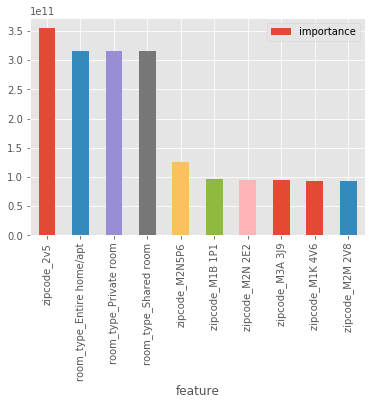

In [46]:
#Checking for features with most importance
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [47]:
#OLS mean squared error on test dataset 
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse

13836547592.224438

In [48]:
ols_r2 = metrics.r2_score(y_test, ols_y_predict)
ols_r2

-1.075105769495634e+16

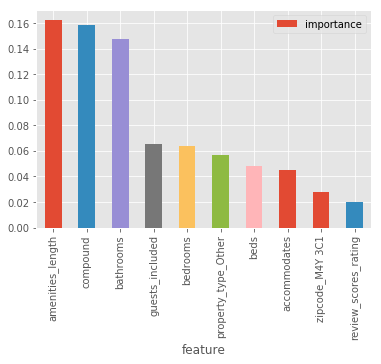

In [49]:
#Creating decision tree model
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Checking for important features
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [50]:

#Decision Tree mean squared error on test dataset
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

336.60805998447455

In [51]:
dtree_r2 = metrics.r2_score(y_test, dtree_y_predict)
dtree_r2

-5.362748125398965

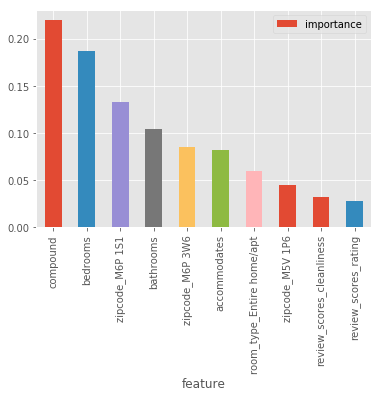

In [52]:
#Creating random forest model
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [53]:
#Get Random Forest mean squared error on test dataset
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

110.35120208010724

In [54]:
rf_r2 = metrics.r2_score(y_test, rf_y_predict)
rf_r2

0.3161673276387116

In [55]:
print("OLS MSE",ols_mse)
print("Decision Tree MSE:", dtree_mse)
print("Random Forest MSE:", rf_mse)

OLS MSE 13836547592.224438
Decision Tree MSE: 336.60805998447455
Random Forest MSE: 110.35120208010724


In [56]:
print("OLS R^2",ols_r2)
print("Decision Tree R^2:", dtree_r2)
print("Random Forest R^2:", rf_r2)

OLS R^2 -1.075105769495634e+16
Decision Tree R^2: -5.362748125398965
Random Forest R^2: 0.3161673276387116
